In [ ]:
!pip install nltk scispacy pandas networkx rdflib scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 528.1/528.1 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 67.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 kB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.3 MB/s eta 0:00:00
  Using cached pybind11-2.6.1-py2.py3-none-any.whl (188 kB)
  Created wheel for nmslib: filename=nmslib-2.1.1-cp310-cp310-linux_x86_64.whl size=13572288 sha256=4fece4d3f1f89212f7c3b7c648436c8342d3d852fc3b8059363939cf406053e5
  Stored in directory: /root/.cache/pip/wheels/21/1a/5d/4cc754a5b1a88405cad184b76f823897a63a8d19afcd4b9314
Successfully built nmslib
  Attempting uninstal

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Regular expression to identify specific terms like HSP100, HSP90, etc.
    pattern = re.compile(r'HSP\d+|HSP27 \(sHSP\)')
    specific_terms = pattern.findall(text)
    
    # Make sure specific terms are not stemmed later
    text = pattern.sub('', text)
    
    tokens = word_tokenize(text)
    tokens = [stemmer.stem(token) for token in tokens if token not in stop_words and token.isalnum()]
    tokens.extend(specific_terms)
    return tokens

# Test with your text
text = """ 
Heat shock proteins (HSPs) are a kind of proteins which are mostly found in bacterial, plant and animal cells, in which they are involved in the monitoring and regulation of cellular life activities. HSPs protect other proteins under environmental and cellular stress by regulating protein folding and supporting the correctly folded structure of proteins as chaperones. During viral infection, some HSPs can have an antiviral effect by inhibiting viral proliferation through interaction and activating immune pathways to protect the host cell. However, although the biological function of HSPs is to maintain the homeostasis of cells, some HSPs will also be hijacked by viruses to help their invasion, replication, and maturation, thereby increasing the chances of viral survival in unfavorable conditions inside the host cell. In this review, we summarize the roles of the heat shock protein family in various stages of viral infection and the potential uses of these proteins in antiviral therapy. HSPs, viral infection, chaperones, protein folding, immunological pathways Heat shock proteins (HSPs) were first discovered in the salivary glands of flies, where they are expressed under heat shock conditions. HSPs have a wide range of molecular weights from approximately 10 to 100 kDa and can be classified into different groups according to their molecular weight, including small heat shock proteins (sHSPs), HSP40, HSP60, HSP70, HSP90 and large heat shock proteins. The sHSPs, most of which are heat-inducible, have a wide range of molecular weights from 12-43 kDa and are widely distributed in a variety of tissues. The ability to prevent the aggregation of proteins and polypeptides is the most important function of many sHSPs. Depending on the status of client proteins, sHSPs exert different molecular chaperone functions. HSP40, HSP60, HSP70 and HSP90 are well-studied heat shock proteins that often perform biological functions in cells as complexes. They are extensively involved in the life cycle of proteins, including protein folding and refolding, transport, degradation, assembly, activity regulation, and translocation, as well as the depolymerization of protein aggregates. The heat shock protein family is also involved in many fundamental cellular processes including cell cycle control, cell survival, hormone signaling and response to cellular stress through the extensive regulation of intracellular proteins. Large HSPs, such as HSP100 and HSP110, contain a loop structure that gives them a high capacity of binding to polypeptide substrates or non-protein ligands such as pathogen-associated molecules. Both HSP100 and HSP110 have chaperone activity with HSP70, and they can regulate protein aggregation by forming HSP104-HSP70­HSP40 and HSP110-HSP70-HSP40 ternary complexes to maintain cellular homeostasis in a variety of cellular life activities. The expression of HSPs is not only induced by heat or cold but is also responsive to a range of stressors including starvation, hypoxia, ultraviolet (UV) irradiation, exposure to heavy metals and microbial infection. During viral infection, HSPs protect the host cells mainly by their chaperone functions. Small heat shock proteins are produced in large quantities in response to stress, partly activating immune signaling pathways, and partly assembling complexes to modulate apoptosis. The bigger members also assemble HSP complexes to fold host proteins correctly and refold aggregates of stress-denatured proteins. Importantly, some heat shock proteins are directly involved in the inhibition of viral replication and transcription. Although the HSP family is a class of protective proteins, they can be hijacked by viruses to aid host cell invasion. Viruses lacking molecular chaperones can utilize the native HSPs of the host cell to help them invade cells and the nucleus, stabilize and regulate their own transcription and translation, assemble viral proteins, or alter the intracellular environment to promote viral proliferation. HSP100 is in Cytoplasm and Nucleus. HSP90 is in Cytoplasm  and Endoplasmic Reticulum (ER) and Mitochondria  and Nucleus. HSP70  is in Chloroplasts  and Cytoplasm  and Endoplasmic Reticulum (ER) and  Mitochondria  and Nucleus. HSP60  is in Chloroplasts  and Cytoplasm  and Mitochondria.  HSP40  is in Cytoplasm  and  Nucleus.   HSP27 (sHSP)  is in  Cytoplasm  and Nucleus. Responses of HSPs under different stress conditions are based on the function of chaperones, and the fact that HSPs widely participate in biomolecular networks by binding to proteins of various functions in space and time. Under normal conditions, HSPs play a role in the regulation of the cellular life cycle and functions, while under stress, HSPs are one of the main systems to be activated and regulate stress resistance, thereby enhancing viability. The main stressors that organisms face can be roughly divided into three categories, including physical, chemical and biological factors. Here, we brie.y summarize the responses of HSPs in response to the most common stressors such as cold, anoxia and pathogenic microorganisms. In response to stressful environments, HSPs regulate transcription and translation by acting as accessory proteins. In a study on the cold adaptation of the Asiatic rice borer moth, small HSPs (sHSPs) were found to act as the first line of cellular defense against protein unfolding caused by the environmental stress, since their protein depolymerization activity is independent of ATP . They are capable of binding a large range of non-native substrate proteins to form sHSP-substrate complexes that prevent irreversible aggregation (30). Four sHSP genes were found in the genome of the species named Chil suppressalis, three of which are highly induced in response to cold stress and associated with HSP Beta-1 (HSPB1)-related protein (HSPB 1AP). HSP70 and HSP90 are then synergistically upregulated at the transcriptional site. Functions  include dissociation, refolding, and re-solubilization of protein aggregates Modification of kinases, steroid hormone receptors, and transcription factors Unfolds misfolded polypeptides; Translocates unfolded polyproteins through membranes Dissociates protein complexes; Segregates unfolded polypeptide chains Promotes unfolding of misfolded polypeptides by both active and passive mechanisms ; Folding, Degradation and Translocation of Proteins ; Maintain cytoskeletal protein stability Against apoptosis level, which requires the participation of  HSP40 and a protein called HSP90 ATPase homolog activator (HSP90aa). Afterwards, HSP70 and HSP90 cooperatively refold proteins. At normal levels of oxygen, HSP60 forms a complex with the pro-apoptotic factor BCL2-associated X (Bax) in the cytosol and inhibits its translocation into the mitochondria, thereby preventing apoptosis. However, when cells are faced with hypoxia, the formation of complexes will be reduced and release Bax for translocation into the mitochondria, which results in the release of cytochrome c as an apoptotic signal. The HSP60-10 complex responds to oxidative stress and induces apoptosis when cells are under the dual stress of hypoxia and DNA damage. HSPs are also induced when the host cell is infected by pathogenic microorganisms. A study on porcine reproductive and respiratory syndrome virus (PRRSV) identi.ed HSP60 as a novel antiviral protein that inhibits viral replication. PRRSV infection activates PP1a/g to dephosphorylate the originally phosphorylated MDA5 and RIG-1, after which MDA5 and RIG-1 are activated through ubiquitination. MAVS is phosphorylated and activated by TBK1, after which it interacts with RIG-I or MDA5, which triggers formation of a signaling synapse resulting in the formation of the canonical IFN-b enhanceosome complex that promotes IFN-b transcription. The RLR/MDA5 (RIG-I like receptor/melanoma differentiation-related gene 5) signaling pathway promotes the production of type I interferon to activate the downstream signaling pathways. Upon the activation of mitochondrial antiviral signaling proteins (MAVS), HSP60 from the mitochondria binds to the MAVS protein and increases the expression of IFN-b, which can inhibit viral replication. A recent study also found that the chaperone HSP27 positively regulates the RLR/MDA5 signaling pathway, which is triggered by encephalomyocarditis virus (EMCV) by stabilizing the expression of MDA5 to inhibit viral replication.  As molecular chaperones, heat shock proteins function by binding to client proteins in response to cellular or organismal stress. Small heat shock proteins bind directly to the target protein to prevent it from unfolding or to transfer it to a complex transfer it to a complex which is inclined to be formed by larger heat shock proteins for further folding or refolding. In response to stress, heat shock proteins either bind directly to protect the target protein, or affect factors that regulate cellular activities such as apoptosis and immune signaling pathways. HSPs are activated by a wide variety of cellular stresses to maintain cellular homeostasis. However, it is also this characteristic that makes HSPs an easy target for viruses to break through host defenses. In this review, we will focus on the main functions of HSPs in viral infection. Biological functions of HSPs in host cells during viral infection include antiviral responses, and also could be utilized by the virus to help cell entry, viral replication and virion assembly. As a class of protective proteins, HSPs can inhibit viral proliferation by interacting with viral molecules and their related proteins. For example, HSC70/HSP90 has already been con.rmed to be a driving force of the RNA-induced silencing complex (RISC) assembly pathway by providing ATP to load small RNA duplexes into argonaute protein, which can promote complex formation. Subsequently, RISC binds to viral mRNA, leading to the repression of viral translation. In the study of HPV, it was found that secreted HSP70 can effectively target dendritic cells with relevant antigens to enhance the antigen-speci.c immune response. The ClpB/HSP104 complex can disassemble disordered aggregates that accumulate due to cellular stress, as well as ordered aggregates formed by prions with the help of the HSP70 chaperone system, and reactivate their constituent proteins. HSP can also regulate immune signaling pathways to resist viral infections. As mentioned above, HSP60 regulates the RLR/MDA5 signaling pathway to in.uence cellular immunity. In addition, HSP40 was also found to bind to MDA5 in the MDA5-MAVS pathway to disrupt the formation of MDA5 multimers, resulting in the suppression of type I IFN induction and protecting host cells from damage caused by excessive in.ammation triggered by viral infection. Many studies have found that the upregulation of HSP27 inhibits the replication of porcine epidemic diarrhea virus (PEDV) and red spotted grouper neuro necrosis virus (RGNNV). HSP27 signi.cantly increases the phosphorylation of NF-kBas an upstream regulator, which in turn upregulates interferon promoter activity and activates downstream interferon-stimulated genes. Viruses have also developed counteracting strategies to significantly downregulate HSP27 expression. In general, HSP27 interacts with many different viral proteins to regulate the activity of IFN-1 and NF-kB signaling pathways. During the two years of the COVID-19 epidemic, many studies on in.ammation caused by coronavirus infection have been reported, in which we can also find new roles of HSPs. The evolutionarily conserved innate immune system is the first defense line against viral infection. The innate immune system is highly sensitive to stimuli, which rapidly recruit cells within minutes (neutrophils) to hours (monocytes/ macrophages) to the site of injury. These rapid responses are orchestrated primarily by the expression of NF-kB, which drives in.ammation during the early phase. There is a unique class of cytoplasmic receptors in the innate immune system called nucleotide-binding and oligomerization domain (NOD)-like receptors (NLRs), which constantly patrol for invading pathogens in the cytoplasm. At the heart of damaging in.ammatory responses in many diseases is a multimolecular complex called the NOD-like receptor protein 3(NLRP3) in.ammasome. In COVID-19, the viral envelope E protein triggers the activation of the NF-kBin.ammatory signaling cascade and the interaction with in.ammatory factors, such as tumor necrosis factor-alpha (TNF-a)and interleukin 6 (IL-6). These changes act as strong stimuli activating the cytosolic innate immune NLRP3 in.ammasome. Once constituted, the NLRP3 in.ammasome is secreted from the cells and can amplify the in.ammatory response by activating the inflammasome and caspase-1 in neighboring cells. A recent study found that overexpression of HSP70 can inhibit the activation of the NLRP3 in.ammasome, which in turn regulates the activation of caspase-1 and the maturation of IL-1b. In related drug treatment studies, HSP90 inhibitors were found to block the initiation and activation of the NLRP3 in.ammasome. Once the cells activate the in.ammatory response, cyclooxygenase-2 (COX-2) is induced and starts producing proin.ammatory arachidonic acid-derived prostaglandins (PGs) to promote the repair of in.ammatory cells and tissues. Furthermore, PGs lead to an increase of the core body temperature (fever), which also triggers the heat shock response (HSR). Under the influence of fever, structural changes in the plasma membrane directly activate heat shock factor 1 (HSF-1), which regulates the transcription of HSPs, expression of cytokines, and early response genes. The production of HSP70 in response to HSF-1 activation is correlated with complex formation between NF-kBand its inhibitor (I-kB) to prevent the translocation of NF-kB into the nucleus, which downregulates the acute in.ammatory response. This avoids excessive protein damage or a cytokine storm induced by excessive inflammation. Heat shock proteins and immunological pathways include HSP27 regulation of the NF-kB pathway. In the NF-kB signaling pathway, nuclear factor kB mainly exists as a heterodimer of p65 and P50, and I-kBa is a major inhibitor of NF-kB, which combines with them to form a complex in the resting state. The dimers are held inactive in the cytoplasm by their interaction with I-kBa proteins. I-kBa is phosphorylated when stimulated by external signals, and after phosphorylation, I-kBa proteins undergo ubiquitin-dependent degradation by the proteasome, after which NF-kBis translocated to the nucleus, where it acts as a transcription factor. The interaction of HSP27 with the 26S proteasome is necessary for the degradation of phosphorylated I-kBa, and overexpression of HSP27 enhances the proteasomal degradation of phosphorylated I-kBa.  HSP70 negatively regulates NLRP3 inflammatory vesicles. After SARS-CoV infects cells, the virus envelope E protein triggers the activation of the NF-kB inflammatory signaling cascade, which activates the NLRP3 inflammasome. Activation of NLRP3 induces the maturation of caspase-1, which in turn activates the secretion of interleukins IL-1b and IL-18. While IL-1b is an important factor in inducing a rise in core body temperature, HSP70, produced in response to the heat shock factor 1 (HSF-1), reduces the inflammatory response blocking NLRP3 and the articulator ASC to induce caspase-1 precursor maturation following a rise in body temperature. Viral binding means attachment to the host cell and this is the first crucial step in the initiation of viral infection. The interaction includes the viral attachment proteins and cellular receptors, which are key determinants of viral host specialization and pathogenesis. As a family of chaperone proteins widely distributed in cells, HSPs have been found to act as receptors for a variety of viruses in recent studies, and they are mainly involved in the viral contact and cell invasion in two ways. Firstly, they participate in the process of viral entry into cells through endocytosis mediated by endocytosin and clathrin. A large number of helper proteins involved in endocytosis mediated by clathrin are present in various cells, and the HSP family is also represented among them. The D isoform of heat shock cognate protein 70 (HSC70) was found to help Japanese encephalitis virus (JEV) penetrate C6 and 36 cells via clathrin mediated endocytosis (58). Another important chaperone, HSP90, was also recently found to form a complex with red spotted grouper neuronecrosis virus (RGNNV) on the cell surface and independently lead to RGNNV internalization through the clathrin endocytosis pathway. Similarly, HSPs can also directly bind to virions as receptors on the cell surface. In existing reports, HSP70 was found to be involved in the invasion of various viruses in C6 and 36 cells. For example, HSC70 is involved in the process of dengue virus (DENV) invasion of cells by interacting with the DENV receptor complex, while HSC70 interacts with the VP5 subunit of rotavirus spike protein to help it enter cells through endocytosis. Similar to HSP70, HSP90 is also an important component of the dengue virus receptor complex. In the available literature, HSP90 was found to be utilized directly as a cell surface to regulate receptor-mediated endocytosis pathways by many viruses, such as infectious bursal disease virus, dengue virus and Japanese encephalitis virus. HSP90AA1 is a subtype of the HSP90 family and it was found to be involved in the cell entry of in.uenza A virus (IAV). IAV was reported to initiate the entry process via multiple endocytic pathways mediated by the viral hemagglutinin (HA) glycoprotein. HSP90AA1 is distributed on the cell surface and can regulate the entry of IAV directly by interacting with viral hemagglutinin (HA). Viral entry into the nucleus represents viruses which need to translocate viral molecules into the nucleus to interfere in the regulation of the cell's internal environment or to advance replication of the viral own genome after invading a cell. HSPs are also involved in nuclear transport or the regulation of the intracellular environment to favor virion production, such as inducing tubulin acetylation to arrest the cell cycle and so on. In IAV infection, HSP90 first exhibits downregulated acetylation levels along with enhanced nuclear transport to assist viral polymerase nuclear entry, after which the virus induces an upregulation of HSP90 acetylation levels, which indicates that HSPs play different roles at different phases of infection. Early in the IAV infection process, HSP40 (DnaJB1) can bind to the nucleoprotein (NP) of IAV with a nuclear localization signal and assists IAV viral ribonucleoprotein (vRNP) with nuclear trafficking through its interaction with nucleoproteins, which is also very important for viral protein entry. Similarly, HSP90 plays a role in enhancing the interaction between viral proteins and tubulin by binding to the acetylated a-tubulin to upregulate nuclear transport, which has been found in several viral infections, including mouse polyomavirus and herpes simplex virus 1. HSPs not only assist in the nucleation of viral molecules, but are also intimately involved in the replication, transcription and translation of viruses, mainly in two ways. Since the HSP family is an important class of chaperones, they generally combine with virus-associated proteins to participate in their replication. Murine latency-associated nuclear antigen (mLANA) is a conserved protein of murine gammaherpesvirus 68 (MHV68) that is of great importance to latency maintenance and acute viral replication. In MHV68-infected 3T12 fibroblasts, mLANA directly interacts with HSC70 and recruits it to accumulate in the nucleus, which helps in the formation of viral replication complexes that can promote viral DNA replication, expression of late viral proteins, and ultimately lytic infection. Duck hepatitis B virus (DHBV) has been reported to rely on the recognition of RNA packaging signals by viral reverse transcriptase (RT), which can be efficiently activated by HSC70 and HSP40, thereby initiating downstream replication and nucleocapsid assembly. Enterovirus A71 (EV-71) is a positive-strand RNA virus in which the initiation of viral protein translation is guided by an internal ribosomal entry site (IRES), and HSC70 can upregulate the activity of IRES in cells to assist viral translation by interaction, thereby promoting the expression of viral proteins in RD cells. As mentioned before, IAV is a negative-sense single-stranded RNA virus that can utilize autophagy to facilitate its replication. Recent research has found that IAV induces autophagy through the binding of hemagglutinin (HA) to HSP90AA1 distributed on the cell surface. The interaction of HA1 and HSP90AA1 inhibits the phosphorylation of mTOR and AKT to induce autophagy through the AKT-MTOR pathway and thereby promote IAV replication. In addition to protein-protein interactions, HSPs can also promote translation by binding to the viral genome. HSC70 can favor virus replication by binding regulator non-coding RNA (ncRNA). Studies have reported that many viruses, such as human immunode.ciency virus (HIV), DENV, and West Nile virus (WNV), encode microRNA-like ncRNA to regulate virus replication. Similarly, rabies virus (RABV) transcribes a small ncRNA, called leader RNA (leRNA). It was also found that HSC70 binds to leRNA to regulate viral replication during infection. Hepatitis C virus (HCV) is currently causing a worldwide epidemic. The nonstructural (NS) proteins are responsible for replication of HCV RNA as well as viral particle assembly, and are primary antiviral targets. In a recent study, Li et al. found that HSC70 co-precipitates with HCV NS proteins and RNA, interacting with the HCV replication complex and participating in HCV replication by regulating RNA translation from the HCV genome. After completion of translation in the cell, the virus usually recruits several host factors to facilitate assembly and budding. Immunogold labeling revealed that HSC70 is attached to the surface of HCV particles by interacting with the HPD (His-Pro-Arg) motif on the E2 envelope protein of the virus. Then HSC70, HCV core, and E2 proteins were found to co-localize at the periphery of lipid droplets, an important site for HCV assembly and release. By using an allosteric HSC70 inhibitor and RNAi-mediated knockdown, Khachatoorian et al. demonstrated that inactivation of HSC70 reduces the speed of HCV particle assembly, thus concluding that HSC70 plays a role in the assembly of viral particles during HCV infection. HSP90 was also found to play an important role in the maturation of viral proteins, including helping viral particle assembly, protein folding, and maintaining protein activity. HSP90 was found to be involved in multiple viral activities, including capsid precursor processing in coxsackieviruses, polioviruses and rhinoviruses, viral capsid assembly in early hepatitis E viral infection, maintenance of L protein stability in lacrosse virus, maintenance of reverse transcriptase activity in hepatitis B virus and NS2/3 protease in hepatitis C virus, as well as assistance in viral L polymerase folding in measles and Nipah virus. In the context of the global coronavirus pandemic, research on HSPs and their roles in coronavirus infection is very popular. Here, we summarize the findings on the role of HSP90 in coronavirus (CoV) maturation. After CoVs invade cells, large numbers of proteins are translated in the endoplasmic reticulum (ER), which causes ER stress and triggers the unfolded protein response (UPR). HSP90 regulates the UPR by stabilizing the ER stress sensor transmembrane kinase IRE1a, which in turn contributes to viral protein folding and replication. In this regard, a recent analysis of RNA-sequencing data from COVID-19 patients also suggested that inhibition of HSP90 could reduce the replication rate of the novel coronavirus (preprint data). This idea has been con.rmed in numerous reports of HSP90 inhibitor experiments, which found that that HSP90 inhibitors such as 17-AAG and Luminespib trigger the activities of the unfolded protein response (UPR) in mice, which protected endothelial cells in the pulmonary aorta and pulmonary microvasculature. According to recent studies on coronaviruses, HSP90 is considered to be a host-dependent factor for human coronaviruses MERS-CoV, SARS-CoV and SARS-CoV-2. The depletion of Hsp90b, the cytosolic isoform of HSP90, profoundly reduced viral growth as shown by both viral load quanti.cation and virion titration. As con.rmed by co-immunoprecipitation, MERS-CoV nucleocapsid protein (NP) is a substrate of HSP90b, which maintains the stability of NP by directly binding it and thereby preventing its degradation by the proteasome. Similarly, they also conducted experiments on the proliferation process of SARS-CoV and SARS-CoV-2, which revealed that the inhibition of HSP90 leads to a significant reduction of virion production. HSP70 and HSP90 are of great importance for viral gene expression since they play a key role in assembling the capsid of some viruses. Viruses utilize HSP70 and HSP90 to fold their proteins and increase their chances of survival under unfavorable host conditions. In many studies on various viruses, the heat shock protein family has been shown to be extensively involved in the viral life cycle, and there have been many advances in the development of antiviral drugs targeting the heat shock protein family. Antiviral drugs targeting heat shock proteins work in three general ways, either by inhibiting the ATPase activity of HSPs, inhibiting the ability of HSPs to form complexes, or triggering modi.cations of HSPs such as phosphorylation and acetylation to reduce their activity . Hsp90 is thought to be the most abundant and evolutionarily conserved heat shock protein. There is also a wealth of research on HSP90-targeted drugs such as geldanamycin (GM), tanespimycin (17-AAG) and histone deacetylase inhibitors . Hsp90 inhibitors were demonstrated to protect cultured cells against infection by EV­A71. Similarly, HSP70isactiveinvarious phases of infection by HCV, Flavivirus and Enterovirus, while HSP70 inhibitors such as quercetin, VER155008 and JC40 also show great potential in the treatment of these viruses. In the treatment of COVID-19, the clinically approved HSP60 inhibitor mizoribine was found to exert an antiviral effect and is considered to be a potentially bene.cial agent for hypertensive patients infected with the new coronavirus. Quercetin is an inhibitor of HSP70 that also inhibits the activity of HSP40, and was found to decrease the intracellular accumulation of infectious particles when applied in the treatment of HCV infection. Among small heat shock proteins, HSP27 has been studied more frequently, and 1,3,5-trihydroxy-13,13­dimethyl-2H-pyran [7,6-b] xanthone, a compound isolated from a traditional Chinese herb, was found to inhibit HSP27 with significant anti-cytopathic effects, leading to the inhibition of EV-A71 infection.
"""
tokens = preprocess_text(text)
print(tokens)


['heat', 'shock', 'protein', 'hsp', 'kind', 'protein', 'mostli', 'found', 'bacteri', 'plant', 'anim', 'cell', 'involv', 'monitor', 'regul', 'cellular', 'life', 'activ', 'hsp', 'protect', 'protein', 'environment', 'cellular', 'stress', 'regul', 'protein', 'fold', 'support', 'correctli', 'fold', 'structur', 'protein', 'chaperon', 'dure', 'viral', 'infect', 'hsp', 'antivir', 'effect', 'inhibit', 'viral', 'prolifer', 'interact', 'activ', 'immun', 'pathway', 'protect', 'host', 'cell', 'howev', 'although', 'biolog', 'function', 'hsp', 'maintain', 'homeostasi', 'cell', 'hsp', 'also', 'hijack', 'virus', 'help', 'invas', 'replic', 'matur', 'therebi', 'increas', 'chanc', 'viral', 'surviv', 'unfavor', 'condit', 'insid', 'host', 'cell', 'in', 'review', 'summar', 'role', 'heat', 'shock', 'protein', 'famili', 'variou', 'stage', 'viral', 'infect', 'potenti', 'use', 'protein', 'antivir', 'therapi', 'hsp', 'viral', 'infect', 'chaperon', 'protein', 'fold', 'immunolog', 'pathway', 'heat', 'shock', 'prote

Ngrams:

In [ ]:
from nltk import ngrams
from collections import Counter

def count_ngrams(text, n):
    # Tokenize the text
    words = nltk.word_tokenize(text)

    # Create the n-grams
    n_grams = ngrams(words, n)

    # Count the n-grams
    ngram_freq = Counter(n_grams)

    return ngram_freq

n = 2  # Change this to count n-grams of different lengths
ngram_freq = count_ngrams(text, n)

# Print the 10 most common n-grams
print(ngram_freq.most_common(10))


AttributeError: ignored

**Sentence Detection**# New Section

In [ ]:
for sentence in my_sentences:
    splitted = sentence.split(" ")
    bigrams = [bigram for bigram in zip(splitted, splitted[1:])]
    print(bigrams)


[('\n\nHIV-1', 'is'), ('is', 'an'), ('an', 'RNA'), ('RNA', 'virus.')]
[('HIV-1', 'has'), ('has', 'genus'), ('genus', 'Lentivirus.')]
[('Lentivirus', 'genus'), ('genus', 'is'), ('is', 'in'), ('in', 'Retroviridae'), ('Retroviridae', 'family.')]
[('Lentiviruses', 'are'), ('are', 'single-stranded'), ('single-stranded', 'virus.')]
[('Lentiviruses', 'are'), ('are', 'positive-sense'), ('positive-sense', 'viruses.')]
[('Lentiviruses', 'are'), ('are', 'enveloped'), ('enveloped', 'viruses.')]
[('Lentiviruses', 'are'), ('are', 'RNA'), ('RNA', 'virus.')]
[('HIV-1', 'contains'), ('contains', 'two'), ('two', 'molecules'), ('molecules', 'of'), ('of', 'RNA.')]
[('RNA', 'becomes'), ('becomes', 'DNA'), ('DNA', 'via'), ('via', 'reverse'), ('reverse', 'transcriptase.')]
[('Viral', 'reverse'), ('reverse', 'transcriptase'), ('transcriptase', 'produces'), ('produces', 'HIV-1'), ('HIV-1', 'DNA.')]
[('HIV-1', 'DNA'), ('DNA', 'is'), ('is', 'imported'), ('imported', 'into'), ('into', 'the'), ('the', 'host-cell')

In [ ]:
for sentence in my_sentences:
    print("Sentence: "+str(sentence))
    my_words = word_tokenize(sentence)
    print("Tokens: ")
    for x in range(len(my_words)):
      print("    "+str(my_words[x]))


from nltk.tokenize import RegexpTokenizer
new_tokenizer = RegexpTokenizer(r'\w+')
for sentence in my_sentences:
    print("Sentence: "+str(sentence))
    my_words = new_tokenizer.tokenize(sentence)
    print("Tokens: ")
    for x in range(len(my_words)):
      print("    "+str(my_words[x]))

Streaming output truncated to the last 5000 lines.
    is
    located
    in
    Intracellular
    .
Sentence: HSPA5 subcellular location is Cytosol.
Tokens: 
    HSPA5
    subcellular
    location
    is
    Cytosol
    .
Sentence: HSPA5 has length 654 aa.
Tokens: 
    HSPA5
    has
    length
    654
    aa
    .
Sentence: HSPA5 has mass 72 kDA.
Tokens: 
    HSPA5
    has
    mass
    72
    kDA
    .
Sentence: HSPA6 has names HSP70B'.
Tokens: 
    HSPA6
    has
    names
    HSP70B
    '
    .
Sentence: HSPA6 is located in Intracellular.
Tokens: 
    HSPA6
    is
    located
    in
    Intracellular
    .
Sentence: HSPA6 subcellular location is Vesicles and additionally in nucleoplasm.
Tokens: 
    HSPA6
    subcellular
    location
    is
    Vesicles
    and
    additionally
    in
    nucleoplasm
    .
Sentence: HSPA6 has length 643 aa.
Tokens: 
    HSPA6
    has
    length
    643
    aa
    .
Sentence: HSPA6 has mass 71 kDA.
Tokens: 
    HSPA6
    has
    mass
    71
    kDA
  

Generate Vocabulary:

In [ ]:
corpus_tokens = new_tokenizer.tokenize(my_text.lower()) #use the tokenizer that removes punctuation
vocab = sorted(set(corpus_tokens))
print(vocab)
print("Tokens:", len(corpus_tokens))
print("Vocabulary:", len(vocab))

['1', '10', '100n', '102', '105', '111', '116', '12', '125m', '1311', '143', '144', '145', '149', '15', '150', '159', '16', '160', '17', '170', '189', '19', '196', '198', '199', '1l', '2', '21', '22', '223', '2243', '226', '23', '232', '235', '249', '25', '250', '253', '254', '26', '260', '27', '273', '28', '29', '3', '30', '304', '309', '316', '324', '326', '337', '34', '340', '341', '348', '35', '358', '36', '360', '37', '379', '38', '388', '39', '397', '4', '40', '409', '41', '412', '42', '44', '45', '4579', '471', '480', '494', '5', '504', '509', '52', '521', '530', '531', '535', '539', '541', '543', '545', '548', '55', '554', '556', '559', '56', '57', '573', '576', '58', '59', '6', '60', '61', '621', '63', '639', '641', '643', '646', '654', '67', '675', '679', '686', '69', '7', '70', '702', '704', '71', '72', '724', '732', '74', '75', '76', '760', '78', '782', '793', '8', '80', '803', '83', '839', '840', '85', '854', '858', '88', '9', '90', '91', '92', '94', '95', '97', '970', '98

Remove Stopwords:

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
print("Stopwords from NLTK:", stopwords.words('english'))
stop_words_nltk = set(stopwords.words('english'))
# we use the token list without punctuations
print("Tokenized corpus:",corpus_tokens)
#now remove stopwords
tokenized_corpus_without_stopwords = [i for i in corpus_tokens if not i in stop_words_nltk]
print("Tokenized corpus without stopwords:",tokenized_corpus_without_stopwords)

Stopwords from NLTK: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 's

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Stemming:

In [ ]:
from nltk.stem import PorterStemmer
stemmer= PorterStemmer()
print("before stemming -> after stemming")
for word in corpus_tokens:
  print(str(word) + " -> " + str(stemmer.stem(word)))
  

before stemming -> after stemming
hiv -> hiv
1 -> 1
is -> is
an -> an
rna -> rna
virus -> viru
hiv -> hiv
1 -> 1
has -> ha
genus -> genu
lentivirus -> lentiviru
lentivirus -> lentiviru
genus -> genu
is -> is
in -> in
retroviridae -> retrovirida
family -> famili
lentiviruses -> lentivirus
are -> are
single -> singl
stranded -> strand
virus -> viru
lentiviruses -> lentivirus
are -> are
positive -> posit
sense -> sens
viruses -> virus
lentiviruses -> lentivirus
are -> are
enveloped -> envelop
viruses -> virus
lentiviruses -> lentivirus
are -> are
rna -> rna
virus -> viru
hiv -> hiv
1 -> 1
contains -> contain
two -> two
molecules -> molecul
of -> of
rna -> rna
rna -> rna
becomes -> becom
dna -> dna
via -> via
reverse -> revers
transcriptase -> transcriptas
viral -> viral
reverse -> revers
transcriptase -> transcriptas
produces -> produc
hiv -> hiv
1 -> 1
dna -> dna
hiv -> hiv
1 -> 1
dna -> dna
is -> is
imported -> import
into -> into
the -> the
host -> host
cell -> cell
nucleus -> nucleu
h

# Lemmatization for Label Generation

Lemmatization:

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')  # downloading wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
print("before lemmatization -> after lemmarization")
for word in corpus_tokens:
  print(str(word) + " -> " + str(lemmatizer.lemmatize(word)))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


before lemmatization -> after lemmarization
hiv -> hiv
1 -> 1
is -> is
an -> an
rna -> rna
virus -> virus
hiv -> hiv
1 -> 1
has -> ha
genus -> genus
lentivirus -> lentivirus
lentivirus -> lentivirus
genus -> genus
is -> is
in -> in
retroviridae -> retroviridae
family -> family
lentiviruses -> lentiviruses
are -> are
single -> single
stranded -> stranded
virus -> virus
lentiviruses -> lentiviruses
are -> are
positive -> positive
sense -> sense
viruses -> virus
lentiviruses -> lentiviruses
are -> are
enveloped -> enveloped
viruses -> virus
lentiviruses -> lentiviruses
are -> are
rna -> rna
virus -> virus
hiv -> hiv
1 -> 1
contains -> contains
two -> two
molecules -> molecule
of -> of
rna -> rna
rna -> rna
becomes -> becomes
dna -> dna
via -> via
reverse -> reverse
transcriptase -> transcriptase
viral -> viral
reverse -> reverse
transcriptase -> transcriptase
produces -> produce
hiv -> hiv
1 -> 1
dna -> dna
hiv -> hiv
1 -> 1
dna -> dna
is -> is
imported -> imported
into -> into
the -> the

In [ ]:
print(lemmatizer.lemmatize('better'))
print(lemmatizer.lemmatize('better',pos='a')) # a for Adjective
print(lemmatizer.lemmatize('is'))
print(lemmatizer.lemmatize('is',pos='v'))  # v for Verb
print(lemmatizer.lemmatize('is',pos='a'))
print(lemmatizer.lemmatize('is',pos='n'))  # n for Noun
print(lemmatizer.lemmatize('richer',pos='n'))
print(lemmatizer.lemmatize('richer',pos='a'))    




better
good
is
be
is
is
richer
rich


# Measuring Quality

Data structures used in TREC:

Labels: the list of relevant document ID's for a particular search or classification operation. (we want this to be based on GOs)

Retrieved: the list with document ID's from all retrieved documents. This includes both relevant and non-relevant documents. Retrieved documents are often ranked on relevance.

In [ ]:
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from tqdm import tqdm
import numpy as np


In [ ]:
# Actual Value
labels = [1, 0, 0, 1, 1, 1, 0, 1, 1, 1]
# Predicted Value
predictions = [0, 1, 1, 1, 1, 0, 1, 0, 1, 0]

In [ ]:
TP = 0
for i in range(0,len(labels)):
    if labels[i] == predictions[i] and labels[i] == 1:
       TP+=1
print("True Positive: ", TP) # 3
FP = 0
for i in range(0,len(labels)):
    if labels[i] == 0 and predictions[i] == 1:
       FP+=1
print("False Positive: ", FP) # 3
TN = 0
for i in range(0,len(labels)):
    if labels[i] == predictions[i] and labels[i] == 0:
       TN+=1
print("True Negative: ", TN) # 0
FN = 0
for i in range(0,len(labels)):
    if labels[i] == 1 and predictions[i] == 0:
       FN+=1
print("False Negative: ", FN) # 4

True Positive:  3
False Positive:  3
True Negative:  0
False Negative:  4


In [ ]:
CP = 0
for i in range(0,len(labels)):
    if labels[i] == predictions[i]:
       CP+=1
print("Correct Prediction: ", CP) # 3
print(CP == TP + TN) # True
ICP = 0
for i in range(0,len(labels)):
    if labels[i] != predictions[i]:
       ICP+=1
print("Incorrect Prediction: ", ICP)# 7
print(ICP == FP + FN) # True

Correct Prediction:  3
True
Incorrect Prediction:  7
True


In [ ]:
accuracy = (TP + TN)/(TP + FP + TN + FN)
print(accuracy*100) 

30.0


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels , predictions)*100)

30.0


In [ ]:
labels = [0,0,0,0,1,0,0,1,0,0]
predictions = [0 ,0 ,0 ,0 ,0 , 0 ,0 ,0 ,0 ,0]
print(accuracy_score(labels , predictions)*100) # 80

80.0


Recalculate for imbalanced document set because a small number of relevant items in a large set of unrelevant ones in information retrieval) is not valid for accuracy measurements.

In [ ]:
TP = 0
for i in range(0,len(labels)):
    if labels[i] == predictions[i] and labels[i] == 1:
       TP+=1
print("True Positive: ", TP) # 3
FP = 0
for i in range(0,len(labels)):
    if labels[i] == 0 and predictions[i] == 1:
       FP+=1
print("False Positive: ", FP) # 3
TN = 0
for i in range(0,len(labels)):
    if labels[i] == predictions[i] and labels[i] == 0:
       TN+=1
print("True Negative: ", TN) # 0
FN = 0
for i in range(0,len(labels)):
    if labels[i] == 1 and predictions[i] == 0:
       FN+=1
print("False Negative: ", FN) # 4

True Positive:  0
False Positive:  0
True Negative:  8
False Negative:  2


In [ ]:
#Recall gives us and Precision cannot be calculated (div 0):
recall = (TP)/(TP+FN)
print(recall*100)


0.0


In [ ]:
labels = [0,0,0,0,1,0,0,1,0,0]
predictions = [1,1,1,1,1,1,1,1,1,1]
print(accuracy_score(labels , predictions)*100)
print(recall_score(labels , predictions)*100)

20.0
100.0


In [ ]:
from sklearn.metrics import f1_score, fbeta_score

# F1 Score
print(f1_score(labels, predictions))

# F2 Score: recall more important than precision
f2_score = fbeta_score(labels, predictions, beta=2)
print(f2_score)

# F0.5 Score: precision more important than recall
f_half_score = fbeta_score(labels, predictions, beta=0.5)
print(f_half_score)


0.33333333333333337
0.5555555555555556
0.23809523809523808


In [ ]:
# Actual Value
labels = [1, 0, 0, 1, 1, 1, 0, 1, 1, 1]
# Predicted Value
predictions = [0, 0, 1, 1, 1, 0, 1, 0, 1, 0]

Confusion Matrices:

Visualization:

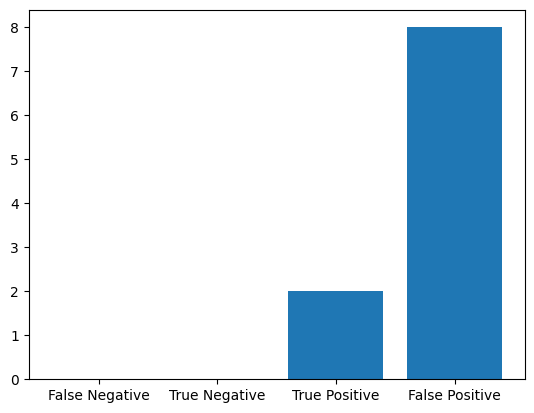

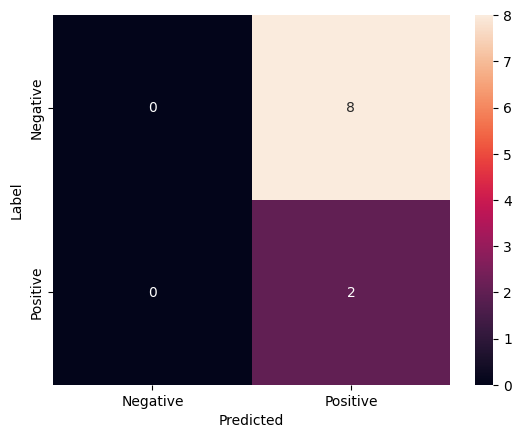

Predictions  1
Labels        
0            8
1            2
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.20      1.00      0.33         2

    accuracy                           0.20        10
   macro avg       0.10      0.50      0.17        10
weighted avg       0.04      0.20      0.07        10

(array([0.2, 1. ]), array([1., 0.]), array([1]))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


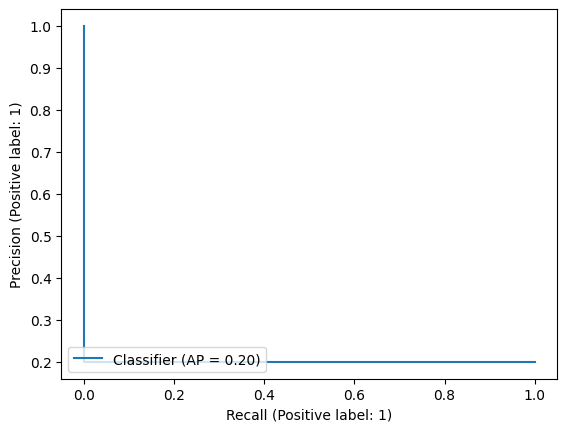

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(labels, predictions)
FN = confusion[1][0]
TN = confusion[0][0]
TP = confusion[1][1]
FP = confusion[0][1]

#Barplot
import matplotlib.pyplot as plt
plt.bar(['False Negative' , 'True Negative' , 'True Positive' , 'False Positive'],[FN,TN,TP,FP])
plt.show()

#Heatmap:
import seaborn as sns
sns.heatmap(confusion , annot=True , xticklabels=['Negative' , 'Positive'] , yticklabels=['Negative' , 'Positive'])
plt.ylabel("Label")
plt.xlabel("Predicted")
plt.show()
#Regular Table
import pandas as pd
data = {'Labels' : labels, 'Predictions': predictions}
df = pd.DataFrame(data, columns=['Labels','Predictions'])
confusion_matrix = pd.crosstab(df['Labels'], df['Predictions'], rownames=['Labels'], colnames=['Predictions'])
print (confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(labels,predictions))
from sklearn.metrics import precision_recall_curve
print(precision_recall_curve(labels,predictions))
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt 
PrecisionRecallDisplay.from_predictions(labels, predictions)

NER Relationship Preparation


In [ ]:
#Manual

import re

def extract_relations(document):
    relations = []
    pattern = re.compile(r'(HSP\d+)\s+(interacts with|inhibits|activates)\s+(HSP\d+)')
    for match in re.finditer(pattern, document):
        relations.append(match.groups())
    return relations

document = """

HIV-1 is an RNA virus.
HIV-1 has genus Lentivirus.
Lentivirus genus is in Retroviridae family. 

Lentiviruses are single-stranded virus.
Lentiviruses are positive-sense viruses.
Lentiviruses are enveloped viruses. 
Lentiviruses are RNA virus.

HIV-1 contains two molecules of RNA.
RNA becomes DNA via reverse transcriptase.

Viral reverse transcriptase produces HIV-1 DNA.
HIV-1 DNA is imported into the host-cell nucleus.
HIV-1 DNA transcription is located at five-prime end.
Five-prime end  is in the DNA.
Five-prime end is in the RNA.
RNA is  located in the host cell.
DNA is located in the host cell.
Cell is in human.
Human is host.

HIV-1 DNA in host is an infected human.
Small HSP have name sHSP
sHSP have ten HSPB1-10
HSPB1-10 are proteins.
HSPB1-10 have molecular weight of minimum 15 kDA.
HSPB1-10 have molecular weight of maximum 30 kDa.
HSPB1-10  have a conserved C-terminal domain.
C-terminus domain is flexible.
C-terminus domain has IXI/V motif. 
N-terminus domain has name WDPF domain.
Cell has parts.
Membrane is a part of a cell.
Nucleus is a part of a cell.
Cytoplasm is part of a cell.
Nucleolus is located in nucleus.
DNA is located in nucleolus.
RNA is made in nucleolus.
HIV-1 causes HIV the disease.
HIV has name human immunodeficiency virus.
HIV-1 is a virus.
HIV is a disease.
HIV-1 is an RNA virus.
G-quadruplex has name G4.
G4 has name Grich.
G4 is formed by nucleic acid sequences.
Nucleic Acid Sequences make DNA.
Nucleic Acid Sequences make RNA.
G-tracts are located in RNA.
G-tracts are located in DNA.
RNA is in virus.
HIV-1 is a virus.
DNA is in chromosome.
Chromosome is in nucleus.
Nucleus is in host.
Chromosomes make genome.
Host is a human.

G-tracts have name G-blocks.
G-tracts have guanines.

G4 stacks G-tetrads
G-tetrad have syn bond angles.
G-tetrads have anti-glycosidic bond angles.
G-tracts form G4 structure .
Structure has parallel conformation. 
Structure has anti-parallel conformation. 
Structure has hybrid core conformation. 
G-tracts share oligonucleotides.
Oligonucleotides have linkers.
Linkers have nucleotide sequences. 
Linkers make loops.
Loops have lateral conformation.
Loops have diagonal conformation. 
Loops have propeller conformation. 
G4 structures are assembled from G-tracts.
G-tracts belong to two genome strands.
G-tracts belong to four genome strands. 
HSPB6 has names PPP1R91, FLJ32389, and HSP20. 
HSPB6 is located in Intracellular. 
Intracellular is located in Cell.
Cell is located in Host.
Host is located in Human.
HSPB6 subcellular location is Cytosol and additionally in nucleoli, Golgi apparatus. 
HSPB6 has length 160 aa. 
HSPB6 has mass 17 kDA.
HSPB7 has names CvHSP. 
HSPB7 is located in Intracellular.
HSPB7 subcellular location is Nucleoplasm. HSPB7 has length 170 aa. 
HSPB7 has mass 19 kDA.
HSPB8 has names CRYAC, E2IG1, HSP22, PP1629, and CMT2L. 
HSPB8 is located in Intracellular. 
HSPB8 subcellular location is Cytosol.
HSPB8 is  in nucleoplasm
HSPB8 is in nuclear bodies. 
HSPB8 has length 196 aa. 
HSPB8 has mass 22 kDA.
HSPB9 has names CT51. 
HSPB9 is located in Intracellular. 
HSPB9 subcellular location is in cell.
 HSPB9 has length 159 aa. 
HSPB9 has mass 17 kDA.
HSPB10 has names ODF1, CT133, ODF27, ODFPG, and ODFP.
 HSPB10 is located in Intracellular. 
HSPB10 subcellular location is in cell. 

HSPB10 has length 250 aa. HSPB10 has mass 28 kDA.
HSPB11 has names IFT25, PP25, C1orf41, and HSPCO34. 
HSPB11 is located in Intracellular. 
HSPB11 subcellular location is Nucleoplasm and  in cytosol.
 HSPB11 has length 144 aa. HSPB11 has mass 16 kDA.
 
 HSP40/DNAJ subcellular location is located in . HSP40/DNAJ has length aa. HSP40/DNAJ has mass kDA.
 
DNAJA1 has names dj-2, hdj-2, HSJ2, HSPF4, NEDD7. DNAJA1 is located in Intracellular. DNAJA1 subcellular location is Cytosol and additionally in microtubules. DNAJA1 has length 397 aa. DNAJA1 has mass 44.9 kDA.
DNAJA2 has names CPR3, DNAJ, DNJ3, HIRIP4. DNAJA2 is located in Intracellular. DNAJA2 subcellular location is Nucleoli, cytosol and additionally in intermediate filaments. DNAJA2 has length 412 aa. DNAJA2 has mass 45.7 kDA.
DNAJA3 has names hTid-1, TID1. DNAJA3 is located in Intracellular. DNAJA3 subcellular location is Mitochondria and additionally in vesicles. DNAJA3 has length 480 aa. DNAJA3 has mass 52.5 kDA.
DNAJA4 has names PRO1472. DNAJA4 is located in Intracellular. DNAJA4 subcellular location is Plasma membrane, cytosol. DNAJA4 has length 397 aa. DNAJA4 has mass 44.8 kDA.
DNAJB1 has names Hsp40, HSPF1, RSPH16B, Sis1,Hdj1. DNAJB1 is located in Intracellular. DNAJB1 subcellular location is Nucleoplasm. DNAJB1 has length 340 aa. DNAJB1 has mass 38 kDA.
DNAJB2 has names CMT2T, HSJ1, HSPF3. DNAJB2 is located in Intracellular. DNAJB2 subcellular location is Nuclear membrane. DNAJB2 has length 324 aa. DNAJB2 has mass 35.6 kDA.
DNAJB3 has names HCG3. DNAJB3 is located in in cell.. DNAJB3 subcellular location is in cell.. DNAJB3 has length 145 aa. DNAJB3 has mass 15.6 kDA.
DNAJB4 has names HLJ1. DNAJB4 is located in Intracellular. DNAJB4 subcellular location is Nucleoplasm and additionally in plasma membrane, cytosol. DNAJB4 has length 337 aa. DNAJB4 has mass 37.8 kDA.
DNAJB5 has names Hsc40. DNAJB5 is located in Intracellular. DNAJB5 subcellular location is Nucleoplasm and additionally in cytosol. DNAJB5 has length 348 aa. DNAJB5 has mass 39.1 kDA.
DNAJB6 has names LGMD1D, MRJ. DNAJB6 is located in Intracellular. DNAJB6 subcellular location is Nucleoplasm and additionally in cytosol. DNAJB6 has length 326 aa. DNAJB6 has mass 36.1 kDA.
DNAJB7 has names HSC3. DNAJB7 is located in Intracellular. DNAJB7 subcellular location is in cell.. DNAJB7 has length 309 aa. DNAJB7 has mass 35.4 kDA.
DNAJB8 has names CT156, MGC33884. DNAJB8 is located in Intracellular. DNAJB8 subcellular location is Cytosol and nucleus. DNAJB8 has length 232 aa. DNAJB8 has mass 25.7 kDA.
DNAJB9 has names MDG1. DNAJB9 is located in Intracellular. DNAJB9 subcellular location is Endoplasmic reticulum, cytosol. DNAJB9 has length 223 aa. DNAJB9 has mass 25.5 kDA.
DNAJB11 has names EDJ, ERdj3, HEDJ. DNAJB11 is located in Intracellular. DNAJB11 subcellular location is Endoplasmic reticulum. DNAJB11 has length 358 aa. DNAJB11 has mass 40.5 kDA.
DNAJB12 has names DJ10, FLJ20027. DNAJB12 is located in Membrane. DNAJB12 subcellular location is Endoplasmic reticulum and additionally in nuclear membrane. DNAJB12 has length 409 aa. DNAJB12 has mass 45.5 kDA.
DNAJB13 has names RSPH16A, TSARG6. DNAJB13 is located in Intracellular. DNAJB13 subcellular location is Plasma membrane. DNAJB13 has length 316 aa. DNAJB13 has mass 36.1 kDA.
DNAJB14 has names FLJ14281. DNAJB14 is located in Intracellular. DNAJB14 subcellular location is Endoplasmic reticulum and nuclear membrane. DNAJB14 has length 379 aa. DNAJB14 has mass 42.5 kDA.
DNAJC1 has names DNAJL1, ERdj1, MTJ1. DNAJC1 is located in Membrane. DNAJC1 subcellular location is Endoplasmic reticulum and nuclear membrane. DNAJC1 has length 554 aa. DNAJC1 has mass 63.9 kDA.
DNAJC2 has names MPHOSPH11, MPP11, ZRF1, ZUO1, zuotin. DNAJC2 is located in Intracellular. DNAJC2 subcellular location is Cytosol and nucleus. DNAJC2 has length 621 aa. DNAJC2 has mass 72 kDA.
DNAJC3 has names ERdj6, HP58, P58, P58IPK, PRKRI. DNAJC3 is located in Intracellular. DNAJC3 subcellular location is Endoplasmic reticulum. DNAJC3 has length 504 aa. DNAJC3 has mass 57.6 kDA.
DNAJC4 has names HSPF2, MCG18. DNAJC4 is located in Intracellular. DNAJC4 subcellular location is Membrane. DNAJC4 has length 249 aa. DNAJC4 has mass 28.2 kDA.
DNAJC5 has names CLN4, DNAJC5A, FLJ00118, FLJ13070. DNAJC5 is located in Membrane. DNAJC5 subcellular location is Golgi apparatus, plasma membrane and additionally in vesicles. DNAJC5 has length 198 aa. DNAJC5 has mass 22.1 kDA.
DNAJC5B has names CSP-beta, MGC26226. DNAJC5B is located in Intracellular. DNAJC5B subcellular location is Membrane. DNAJC5B has length 199 aa. DNAJC5B has mass 22.5 kDA.
DNAJC5G has names CSP-gamma, FLJ40417. DNAJC5G is located in Membrane. DNAJC5G subcellular location is Membrane. DNAJC5G has length 189 aa. DNAJC5G has mass 21.4 kDA.
DNAJC6 has names KIAA0473, PARK19. DNAJC6 is located in Intracellular. DNAJC6 subcellular location is Cytosol and additionally in nucleoplasm, plasma membrane. DNAJC6 has length 970 aa. DNAJC6 has mass 105.7 kDA.
DNAJC7 has names TPR2, TTC2. DNAJC7 is located in Intracellular. DNAJC7 subcellular location is Nucleoplasm and additionally in cytosol. DNAJC7 has length 494 aa. DNAJC7 has mass 56.4 kDA.
DNAJC8 has names SPF31. DNAJC8 is located in Intracellular. DNAJC8 subcellular location is Nucleoplasm. DNAJC8 has length 253 aa. DNAJC8 has mass 29.8 kDA.
DNAJC9 has names JDD1, SB73. DNAJC9 is located in Intracellular. DNAJC9 subcellular location is Nucleoplasm and additionally in plasma membrane. DNAJC9 has length 260 aa. DNAJC9 has mass 29.9 kDA.
DNAJC10 has names ERdj5, PDIA19. DNAJC10 is located in Membrane. DNAJC10 subcellular location is Endoplasmic reticulum. DNAJC10 has length 793 aa. DNAJC10 has mass 91.1 kDA.
DNAJC11 has names FLJ10737. DNAJC11 is located in Intracellular. DNAJC11 subcellular location is Mitochondrial. DNAJC11 has length 559 aa. DNAJC11 has mass 63.3 kDA.
DNAJC12 has names JDP1. DNAJC12 is located in Intracellular. DNAJC12 subcellular location is Cytosol. DNAJC12 has length 198 aa. DNAJC12 has mass 23.4 kDA.
DNAJC13 has names KIAA0678, RME8. DNAJC13 is located in Membrane. DNAJC13 subcellular location is Vesicles and additionally in cytosol. DNAJC13 has length 2243 aa. DNAJC13 has mass 254.4 kDA.
DNAJC14 has names DNAJ, DRIP78, FLJ32792, HDJ3, LIP6. DNAJC14 is located in Intracellular. DNAJC14 subcellular location is Endoplasmic reticulum membrane. DNAJC14 has length 702 aa. DNAJC14 has mass 78.6 kDA.
DNAJC15 has names DNAJD1, MCJ. DNAJC15 is located in Membrane. DNAJC15 subcellular location is Mitochondrial membrane. DNAJC15 has length 150 aa. DNAJC15 has mass 16.4 kDA.
DNAJC16 has names KIAA0962. DNAJC16 is located in Membrane. DNAJC16 subcellular location is Vesicles. DNAJC16 has length 782 aa. DNAJC16 has mass 90.6 kDA.
DNAJC17 has names FLJ10634. DNAJC17 is located in Intracellular. DNAJC17 subcellular location is Nucleoplasm. DNAJC17 has length 304 aa. DNAJC17 has mass 34.7 kDA.
DNAJC18 has names MGC29463. DNAJC18 is located in Intracellular. DNAJC18 subcellular location is Cell Junctions and additionally in cytosol. DNAJC18 has length 358 aa. DNAJC18 has mass 41.6 kDA.
DNAJC19 has names Pam18, Tim14, TIMM14. DNAJC19 is located in Membrane. DNAJC19 subcellular location is Mitochondrial membrane. DNAJC19 has length 116 aa. DNAJC19 has mass 12.5 kDA.
DNAJC20 has names DNAJC20, HSC20, Jac1. DNAJC20 is located in Intracellular. DNAJC20 subcellular location is Nucleoplasm, mitochondria, cytosol. DNAJC20 has length 235 aa. DNAJC20 has mass 27.4 kDA.
DNAJC21 has names DNAJA5, GS3, JJJ1. DNAJC21 is located in Intracellular. DNAJC21 subcellular location is Nucleus, nucleoli, cytosol. DNAJC21 has length 576 aa. DNAJC21 has mass 67.1 kDA.
DNAJC22 has names FLJ13236, wus. DNAJC22 is located in Membrane. DNAJC22 subcellular location is Vesicles. DNAJC22 has length 341 aa. DNAJC22 has mass 38.1 kDA.
DNAJC23 has names SEC63, ERdj2, PRO2507, SEC63L. DNAJC23 is located in Membrane. DNAJC23 subcellular location is Endoplasmic reticulum. DNAJC23 has length 760 aa. DNAJC23 has mass 88 kDA.
DNAJC24 has names DPH4, JJJ3, ZCSL3. DNAJC24 is located in Intracellular. DNAJC24 subcellular location is Cytosol. DNAJC24 has length 149 aa. DNAJC24 has mass 17.1 kDA.
DNAJC25 has names bA16L21.2.1. DNAJC25 is located in Membrane. DNAJC25 subcellular location is Nucleoplasm and additionally in cytosol. DNAJC25 has length 360 aa. DNAJC25 has mass 42.4 kDA.
DNAJC26 has names GAK (cyclin G–associated kinase. DNAJC26 is located in Intracellular. DNAJC26 subcellular location is Golgi apparatus and additionally in vesicles. DNAJC26 has length 1311 aa. DNAJC26 has mass 143.2 kDA.
DNAJC27 has names RabJS, RBJ. DNAJC27 is located in Intracellular. DNAJC27 subcellular location is Nucleoplasm and additionally in cytosol. DNAJC27 has length 273 aa. DNAJC27 has mass 30.9 kDA.
DNAJC28 has names C21orf55, C21orf78. DNAJC28 is located in Intracellular. DNAJC28 subcellular location is Golgi transport complex. DNAJC28 has length 388 aa. DNAJC28 has mass 45.8 kDA.
DNAJC29 has names SACS, ARSACS, DKFZp686B15167, KIAA0730, PPP1R138, SPAX6. DNAJC29 is located in Intracellular. DNAJC29 subcellular location is Cytosol. DNAJC29 has length 4579 aa. DNAJC29 has mass 521.1 kDA.
DNAJC30 has names WBSCR18. DNAJC30 is located in Membrane. DNAJC30 subcellular location is Mitochondrial membrane. DNAJC30 has length 226 aa. DNAJC30 has mass 26 kDA.
Chaperonins/HSP60/HSPD has names . Chaperonins/HSP60/HSPD is located in . Chaperonins/HSP60/HSPD subcellular location is . Chaperonins/HSP60/HSPD has length aa. Chaperonins/HSP60/HSPD has mass kDA.
HSPD1 has names HLD4, CPN60, GROEL, HSP60, HSPD1, HSP65, SPG13, HSP-60, HuCHA60. HSPD1 is located in Intracellular. HSPD1 subcellular location is Mitochondria. HSPD1 has length 573 aa. HSPD1 has mass 61 kDA.
CCT1 has names TCP1, CCTA, CCT-alpha, TCP-1-alpha, D6S230E. CCT1 is located in Intracellular. CCT1 subcellular location is Cytosol, centrosome. CCT1 has length 556 aa. CCT1 has mass 60 kDA.
CCT2 has names CCTB, CCT-beta, TCP-1-beta, HEL-S-100n, 99D8.1, PRO1633. CCT2 is located in Intracellular. CCT2 subcellular location is Cytosol. CCT2 has length 535 aa. CCT2 has mass 57 kDA.
CCT3 has names CCTG, CCT-gamma, TCP-1-gamma, TRiC5, PIG48. CCT3 is located in Intracellular. CCT3 subcellular location is Plasma membrane, cytosol. CCT3 has length 545 aa. CCT3 has mass 61 kDA.
CCT4 has names CCTD, CCT-delta, TCP-1-delta, SRB. CCT4 is located in Intracellular. CCT4 subcellular location is Cytosol and additionally in nucleoplasm. CCT4 has length 539 aa. CCT4 has mass 58 kDA.
CCT5 has names CCTE, CCT-epsilon, TCP-1-epsilon, KIAA0098, HEL-S-69, PNAS-102. CCT5 is located in Intracellular. CCT5 subcellular location is Cytoplasm and cytoskeleton. CCT5 has length 541 aa. CCT5 has mass 60 kDA.
CCT6A has names CCT6, CCTZ, CCT-zeta, CCT-zeta1, TCP-1-zeta, HTR3, TCP20, TTCP20. CCT6A is located in Intracellular. CCT6A subcellular location is Cytosol. CCT6A has length 531 aa. CCT6A has mass 58 kDA.
CCT6B has names CCTZ2, CCT-zeta2, TSA303. CCT6B is located in Intracellular. CCT6B subcellular location is Cytosol. CCT6B has length 530 aa. CCT6B has mass 58 kDA.
CCT7 has names CCTH, CCT-eta, TCP-1-eta, NIP7-1. CCT7 is located in Intracellular. CCT7 subcellular location is Cytosol. CCT7 has length 543 aa. CCT7 has mass 59 kDA.
CCT8 has names CCTQ, CCT-theta, TCP-1-theta, KIAA002, PRED71. CCT8 is located in Intracellular. CCT8 subcellular location is Intermediate filaments and additionally in cytosol, nucleoplasm. CCT8 has length 548 aa. CCT8 has mass 60 kDA.
HSP70/HSPA has names . HSP70/HSPA is located in . HSP70/HSPA subcellular location is . HSP70/HSPA has length aa. HSP70/HSPA has mass kDA.
HSPA1A has names HSP70.1, HSP70-1, HSP72, HSPA1, HSX70. HSPA1A is located in Intracellular. HSPA1A subcellular location is Nucleoplasm, vesicles and additionally in cytosol. HSPA1A has length 641 aa. HSPA1A has mass 70 kDA.
HSPA1B has names HSP70.2, HSP70-2, HSP72, HSPA1, HSX70. HSPA1B is located in Intracellular. HSPA1B subcellular location is Nucleoplasm, vesicles and additionally in cytosol. HSPA1B has length 641 aa. HSPA1B has mass 70 kDA.
HSPA1L has names HSP70-HOM, Hum70t, HSP70-1L. HSPA1L is located in Intracellular. HSPA1L subcellular location is Vesicles and additionally in nucleoplasm. HSPA1L has length 641 aa. HSPA1L has mass 70 kDA.
HSPA2 has names HSP70-2, HSP70-3. HSPA2 is located in Intracellular. HSPA2 subcellular location is Vesicles and additionally in nucleoplasm. HSPA2 has length 639 aa. HSPA2 has mass 70 kDA.
HSPA5 has names BiP, GRP78, MIF2. HSPA5 is located in Intracellular. HSPA5 subcellular location is Cytosol. HSPA5 has length 654 aa. HSPA5 has mass 72 kDA.
HSPA6 has names HSP70B'. HSPA6 is located in Intracellular. HSPA6 subcellular location is Vesicles and additionally in nucleoplasm. HSPA6 has length 643 aa. HSPA6 has mass 71 kDA.
HSPA8 has names HSC70, HSP73, HSC71, HSPA10. HSPA8 is located in Intracellular. HSPA8 subcellular location is Nucleoplasm and additionally in vesicles. HSPA8 has length 646 aa. HSPA8 has mass 71 kDA.
HSPA9 has names Mortalin, GRP75, mt-HSP70, HSPA9B. HSPA9 is located in Intracellular. HSPA9 subcellular location is Mitochondria. HSPA9 has length 679 aa. HSPA9 has mass 74 kDA.
HSPA12A has names KIAA0417. HSPA12A is located in Intracellular. HSPA12A subcellular location is Golgi apparatus, cytosol. HSPA12A has length 675 aa. HSPA12A has mass 75 kDA.
HSPA12B has names C20orf60. HSPA12B is located in Intracellular. HSPA12B subcellular location is Nucleoplasm. HSPA12B has length 686 aa. HSPA12B has mass 76 kDA.
HSPA13 has names STCH. HSPA13 is located in Intracellular. HSPA13 subcellular location is Microsomes. HSPA13 has length 471 aa. HSPA13 has mass 52 kDA.
HSPA14 has names HSP70L1, HSP60, HSP70-4,. HSPA14 is located in Intracellular. HSPA14 subcellular location is in cell.. HSPA14 has length 509 aa. HSPA14 has mass 55 kDA.
HSP90/HSPC has names . HSP90/HSPC is located in . HSP90/HSPC subcellular location is . HSP90/HSPC has length aa. HSP90/HSPC has mass kDA.
HSP90AA1 has names LAP2, HSP86, HSPC1, HSPCA, HSP89A, HSP89, HSP90, HSP90A, HSP90-alpha, Renal Carcinoma Antigen NY-REN-38, EL52, FLJ31884. HSP90AA1 is located in Intracellular. HSP90AA1 subcellular location is Cytosol. HSP90AA1 has length 854 aa. HSP90AA1 has mass 98 kDA.
HSP90AA2 has names LAP2, HSP86, HSPC1, HSPCA, HSP89A, HSP89, HSP90, HSP90A, HSP90-alpha, Renal Carcinoma Antigen NY-REN-38, EL52,. HSP90AA2 is located in Intracellular. HSP90AA2 subcellular location is Cytosol. HSP90AA2 has length 732 aa. HSP90AA2 has mass 85 kDA.
HSP90AB1 has names HSPC2, HSPCB, D6S182, HSP90B, HSP90-beta, HSP84. HSP90AB1 is located in Intracellular. HSP90AB1 subcellular location is Cytosol. HSP90AB1 has length 724 aa. HSP90AB1 has mass 83 kDA.
HSP90B1 has names ECGP, GP96, TRA1, GRP94, endoplasmin, HEL35, HEL-S-125m. HSP90B1 is located in Intracellular. HSP90B1 subcellular location is Endoplasmic reticulum. HSP90B1 has length 803 aa. HSP90B1 has mass 92 kDA.
TRAP1 has names HSP75, HSP90L. TRAP1 is located in Intracellular. TRAP1 subcellular location is Mitochondria. TRAP1 has length 704 aa. TRAP1 has mass 80 kDA.
HSP110/HSPH has names . HSP110/HSPH is located in . HSP110/HSPH subcellular location is . HSP110/HSPH has length aa. HSP110/HSPH has mass kDA.
HSPH1 has names HSP110, HSP105A, HSP105B, KIAA0201, NY-CO-25. HSPH1 is located in Intracellular. HSPH1 subcellular location is Cytosol and additionally in nucleoplasm. HSPH1 has length 858 aa. HSPH1 has mass 97 kDA.
HSPH2 has names HSPA4, APG2, HSP70RY. HSPH2 is located in Intracellular. HSPH2 subcellular location is Nucleoplasm, cytosol. HSPH2 has length 840 aa. HSPH2 has mass 94 kDA.
HSPH3 has names HSPA4L, APG1, OSP94. HSPH3 is located in Intracellular. HSPH3 subcellular location is Centrosome, cytosol. HSPH3 has length 839 aa. HSPH3 has mass 95 kDA.
HSPH4 has names HYOU1, GRP170, ORP150, HSP12A. HSPH4 is located in Intracellular. HSPH4 subcellular location is Endoplasmic reticulum. HSPH4 has length 999 aa. HSPH4 has mass 111 kDA.

"""

relations = extract_relations(document)
print(relations)


[]


In [ ]:
!pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 60.1 MB/s eta 0:00:00


# Labeling

In [ ]:
import pandas as pd

df = pd.read_csv('/content/G4HSP Labeling data - Sheet2.csv')

In [ ]:
import re

def custom_tokenizer(text):
    # Remove leading/trailing whitespaces
    text = text.strip()
    
    # Tokenize the text using a custom pattern
    pattern = r'\b\w+\b'  # Matches whole words
    tokens = re.findall(pattern, text)
    
    return tokens

# Apply the custom tokenizer to the 'Sentence' column
df['Tokenized Sentence'] = df['Sentence'].apply(custom_tokenizer)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Map words to integer indices
word_encoder = LabelEncoder()
df['Word Encoded'] = word_encoder.fit_transform(df['Word'])

# Encode the labels
label_encoder = LabelEncoder()
df['Label Encoded'] = label_encoder.fit_transform(df['Label'])


# Split Data into Training and Testing


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df['Tokenized Sentence'], df['Label Encoded'], test_size=0.2)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
import re
import numpy as np

# Step 1: Load the Data
df = pd.read_csv('/content/G4HSP Labeling data - Sheet2.csv')

# Step 2: Preprocess the Data
def custom_tokenizer(text):
    # Remove leading/trailing whitespaces
    text = text.strip()

    # Tokenize the text using a custom pattern
    pattern = r'\b\w+\b'  # Matches whole words
    tokens = re.findall(pattern, text)

    return ' '.join(tokens)

# Apply the custom tokenizer to the 'Sentence' column
df['Tokenized Sentence'] = df['Sentence'].apply(custom_tokenizer)

# Step 3: Handle Missing Values
df = df.dropna(subset=['Tokenized Sentence', 'Label'])

# Step 4: Prepare the Data for Training
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Tokenized Sentence'])
Y = df['Label']

# Step 5: Split the Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Step 6: Train the Model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Step 7: Make Predictions
Y_pred = model.predict(X_test)

# Step 8: Evaluate the Model
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.6666666666666666
Precision: 0.47058823529411764
Recall: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Need to generate more data and will do so with Uniprot:

In [ ]:
import requests
import pandas as pd

def generate_data_from_uniprot(query, filename):
    url = f"https://www.uniprot.org/uniprot/?query={query}&format=tab&columns=id,entry_name,protein_names,organism,length"
    response = requests.get(url)
    data = response.text
    lines = data.split("\n")
    lines = [line.split("\t") for line in lines if line]
    
    # Convert the data into a DataFrame
    columns = ["Entry", "Entry Name", "Protein names", "Organism", "Length"]
    df = pd.DataFrame(lines[1:], columns=columns)
    
    # Save the DataFrame to a CSV file
    df.to_csv(filename, index=False)
    print(f"Data saved to {filename}")

# Example usage
query = "heat shock protein"
filename = "uniprot_data.csv"
generate_data_from_uniprot(query, filename)


Data saved to uniprot_data.csv


Try Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the features and labels
features = [...]  # Extracted features
labels = [...]  # Corresponding labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=42)

# Initialize and train the Random Forests classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


ValueError: ignored

# to do

o use the UniProt data to train and test your model, you need to align it with your labeled data. Here's a general approach you can follow:

Load your labeled data: If you have already labeled data stored in a CSV file or any other format, you can read it using the appropriate library (e.g., Pandas).

Load the UniProt data: Similarly, load the UniProt data from the uniprot_data.csv file or any other source using a library like Pandas.

Align the data: Match the UniProt entries with your labeled data based on a common identifier such as protein names or UniProt IDs. This can be done by merging or joining the two dataframes based on the common column.

Split the data: Split the aligned data into training and testing sets, maintaining the label proportions. You can use the train_test_split function from scikit-learn for this purpose.

Preprocess the data: Preprocess both the labeled data and UniProt data, which may include cleaning, tokenization, feature extraction, and encoding.

Train and test the model: Use your labeled data as the training set and the UniProt data as the testing set. Apply your chosen model and evaluate its performance using appropriate metrics such as accuracy, precision, recall, or F1 score.

Here's a high-level code example to illustrate the steps described above:

# Node Graph


In [ ]:
import pandas as pd

# Read the UniProt XLSX file
df = pd.read_excel('/content/uniprot-compressed_true_download_true_fields_accession_2Cgo_2Cid_2Cp-2023.05.16-13.27.35.14.xlsx')


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Extract relevant columns: Identify the relevant columns from the DataFrame that contain the necessary information for creating the RDF/TTL graph  like "Entry", "Gene Ontology", "Protein names", and "Gene Names".

In [ ]:
# Extract relevant columns
entries = df['Entry']
go_annotations = df['Entry Name']
protein_names = df['Protein names']
gene_names = df['Gene Names']


Create RDF/TTL statements: Iterate over the data and generate RDF/TTL statements based on the desired format and ontology. You can use a library like RDFLib to create and manipulate RDF graphs.

In [ ]:
from rdflib import Graph, Namespace, Literal
from rdflib.namespace import RDF, RDFS

# Create a new RDF graph
graph = Graph()

# Define your own namespaces for the ontology
ns = Namespace("http://example.org/ontology#")
ns_uniprot = Namespace("http://identifiers.org/uniprot/")

# Iterate over the data and create RDF statements
for i in range(len(entries)):
    entry = entries[i]
    go_annotation = go_annotations[i]
    protein_name = protein_names[i]
    gene_name = gene_names[i]
    
    # Create RDF triples
    graph.add((ns_uniprot[entry], RDF.type, ns["Protein"]))
    graph.add((ns_uniprot[entry], RDFS.label, Literal(protein_name)))
    graph.add((ns_uniprot[entry], ns["hasGeneName"], Literal(gene_name)))
    graph.add((ns_uniprot[entry], ns["hasGOAnnotation"], Literal(go_annotation)))


Serialize:

Serialize the RDF/TTL graph: Once you have added all the necessary RDF triples, you can serialize the graph into a TTL file using the desired file name.

In [ ]:
# Serialize the RDF graph to a TTL file
graph.serialize(destination='hsp_graph.ttl', format='turtle')


<Graph identifier=N7b45d2197f5f40c4b87d8d03e204a789 (<class 'rdflib.graph.Graph'>)>

Visualize

In [ ]:
!pip install pyvis


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import rdflib

# Load the data from the CSV file
data = pd.read_csv('uniprot_data.csv')

# Create an RDF graph
graph = rdflib.Graph()

# Define the RDF namespaces
namespaces = {
    'rdf': rdflib.namespace.RDF,
    'rdfs': rdflib.namespace.RDFS,
    'go': rdflib.Namespace('http://www.geneontology.org/formats/oboInOwl#'),
    # Add more namespaces as needed
}

# Bind the namespaces to the graph
for prefix, namespace in namespaces.items():
    graph.bind(prefix, namespace)

# Iterate over the data and add RDF triples to the graph
for index, row in data.iterrows():
    entry = row['Entry']
    gene_names = row['Gene Names'].split(';')
    go_annotations = row['Gene Ontology (GO)'].split(';')

    # Create the subject URI for the entry
    subject_uri = rdflib.URIRef(f'http://example.org/entry/{entry}')

    # Add triples for gene names
    for gene_name in gene_names:
        predicate = namespaces['rdfs'].label
        object_literal = rdflib.Literal(gene_name.strip())
        graph.add((subject_uri, predicate, object_literal))

    # Add triples for GO annotations
    for go_annotation in go_annotations:
        predicate = namespaces['go'].hasExactSynonym
        object_literal = rdflib.Literal(go_annotation.strip())
        graph.add((subject_uri, predicate, object_literal))

# Save the graph as TTL file
graph.serialize(destination='hsp_graph.ttl', format='turtle')


<Graph identifier=N268a8ef00a87406d844396da8969252f (<class 'rdflib.graph.Graph'>)>

In [ ]:
import rdflib
import csv
import networkx as nx
from networkx.readwrite import gexf

# Load the TTL data into an RDF graph
graph = rdflib.Graph()
graph.parse('hsp_graph.ttl', format='turtle')

# Prepare the data for Gephi
nodes = set()
edges = set()

for subject, predicate, obj in graph:
    # Extract the node names and edge information
    if isinstance(obj, rdflib.term.URIRef):
        nodes.add((str(subject), str(subject)))
        nodes.add((str(obj), str(obj)))
        edges.add((str(subject), str(obj), str(predicate)))

# Create a NetworkX graph
nx_graph = nx.Graph()

# Add nodes and edges to the graph
for node_id, label in nodes:
    nx_graph.add_node(node_id, label=label)
    
for source, target, label in edges:
    nx_graph.add_edge(source, target, label=label)

# Save the graph as a .gephi file
nx.write_gexf(nx_graph, 'hsp_graph.gephi')
